In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,ShuffleSplit
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle

In [2]:
dataframe=pd.read_excel('合格热处理预测.xlsx')
dataframe

,合金的牌号,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,...,应力,固溶处理温度,固溶处理时间,强化相溶解温度,稳定时效温度,稳定时效时间,时效温度,时效时间,蠕变时间,是否维合格热处理
0,GH4738,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,450,1080,4.0,1037.00,845,24,760,16,1949.00,1
1,GH4738,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,380,1080,4.0,1037.00,845,24,760,16,1550.00,1
2,GH4738,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,350,1080,4.0,1037.00,845,24,760,16,1995.00,1
3,GH4738,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,...,517,1080,4.0,1007.91,845,24,760,16,104.00,1
4,GH4738,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,...,330,1080,4.0,1007.91,845,24,760,16,82.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,170,1100,2.0,1048.46,760,16,0,0,35.00,1
136,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,170,1100,4.0,1048.46,760,16,0,0,42.96,1
137,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,170,1120,0.5,1048.46,800,1,0,0,40.75,1
138,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,170,1120,0.5,1048.46,800,8,0,0,50.45,1


In [3]:
dataframe_change1=dataframe.drop('合金的牌号',axis=1)
dataframe_change2=dataframe_change1.drop('是否维合格热处理',axis=1)
original_data=dataframe_change2.values
data_creep_time=original_data[:,-1]#获取真实的蠕变时间
data = original_data[:, :-1]
target = original_data[:, -1]
data_x = MinMaxScaler().fit_transform(data)
data_y = np.log(target)

In [4]:
param_grid={'C':[0.001,0.01,0.1,1,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700,
                 750,800,850,900,950,1000],
           'gamma':[0.001,0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
                    0.8,0.85,0.9,0.95,1,10]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=10)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,random_state=0,test_size=.25)
grid_search.fit(x_train,y_train.astype('int'))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:2f}".format(grid_search.best_score_))

C:\anocala\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best parameters:{'C': 900, 'gamma': 0.15}
Best cross-validation score:0.602727


In [5]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
model = SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0])  
model.fit_transform(data_x,data_y) 
result=model.scores_
result_ture=result
print(result_ture) 

[ 0.26258804 -0.26428256  0.16342208 -0.1686553   0.23729009  0.27868359
 -0.15319043 -0.40869538  0.19922265 -0.35252104  0.17414547  0.15587328
 -0.14173415 -0.05006215  0.20945302  0.30567996  0.28574573 -0.15390939
  0.38625802  0.02824308 -0.12487944]


In [6]:
df_df=dataframe_change2.drop('蠕变时间',axis=1)
person_name=df_df.columns.values
df=pd.DataFrame({'tezheng':person_name,'xishu':result_ture})
df.to_excel("pearsonr.xlsx")

In [7]:
result_ture1=abs(result_ture)
rt=np.nan_to_num(result_ture1)
n_num=rt
n = len(n_num)
n_num.sort()
if n % 2 == 0:
    median1 = n_num[n//2]
    median2 = n_num[n//2 - 1]
    median = (median1 + median2)/2
else:
    median = n_num[n//2]
print("Median is: " + str(median))

Median is: 0.19922265397882272


In [8]:
df1=dataframe_change2.drop('蠕变时间',axis=1)
feat_name=df1.columns.values
feat_name

array(['Ni', 'Cr', 'Co', 'Fe', 'Al', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B',
       'Zr', '温度', '应力', '固溶处理温度', '固溶处理时间', '强化相溶解温度', '稳定时效温度',
       '稳定时效时间', '时效温度', '时效时间'], dtype=object)

In [9]:
def mape_function(y_pred, y_true):
    return abs(np.sum((y_pred - y_true) / y_true) / len(y_pred))
feat_names=[]
for i in range(0,21):
    for j in range(1,21):
        sum_all=rt[i]+rt[j]
        if sum_all>0.19922265397882272:
            from sklearn.svm import SVR#支持向量机回归
            svr = SVR(kernel='rbf', C=900, gamma=0.15)
            train_x=data_x[:,i]
            train_y=data_y
            train_x=train_x.reshape((140,1))
            train_y=train_y.reshape((140,1))
            svr.fit(train_x,train_y)
            pre_test=svr.predict(train_x)
            mape_data=mape_function(pre_test, data_y)
            
            from sklearn.svm import SVR#支持向量机回归
            svr = SVR(kernel='rbf', C=900, gamma=0.15)
            train_xx=data_x[:,j]
            train_yy=data_y
            train_xx=train_xx.reshape((140,1))
            train_yy=train_yy.reshape((140,1))
            svr.fit(train_xx,train_yy)
            pre_test_test=svr.predict(train_xx)
            mape_data_data=mape_function(pre_test_test, data_y)
            if mape_data>=mape_data_data:
                feat_names.append(feat_name[j])
            else:
                feat_names.append(feat_name[i])
print(feat_names)   

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

['C', 'B', 'Zr', '温度', '应力', '固溶处理温度', 'Ni', '强化相溶解温度', '稳定时效温度', '稳定时效时间', '时效温度', '时效时间', 'Cr', 'Cr', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Cr', 'Co', 'Fe', 'Al', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', '温度', '应力', '固溶处理温度', 'Co', '强化相溶解温度', '稳定时效温度', '稳定时效时间', '时效温度', '时效时间', 'Fe', 'Fe', 'Fe', 'Fe', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Cr', 'Al', 'Fe', 'Al', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', '温度', '应力', '固溶处理温度', 'Al', '强化相溶解温度', 'Al', 'Al', '时效温度', 'Al', 'Cr', 'Ti', 'Fe', 'Ti', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', '温度', '应力', '固溶处理温度', 'Ti', 'Ti', 'Ti', 'Ti', '时效温度', 'Ti', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Mo', 'W', 'Nb', 'Nb', 'Zr', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Nb', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'Mo', 'W', 'W', 'W', 'W', 'W', 'W', 'Mo', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 

C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anocala\lib\site-

In [10]:
List=feat_names
mylist = set(List)
for i in mylist:
    print("%s:%d" %(i,List.count(i)))

C:32
应力:18
Nb:33
Fe:25
Zr:36
Co:3
时效时间:10
稳定时效温度:6
Ni:1
B:30
固溶处理时间:1
Al:11
稳定时效时间:8
Cr:22
温度:20
Mo:39
W:37
Ti:15
固溶处理温度:24
时效温度:22
强化相溶解温度:14


In [12]:
List=feat_names
mylist = set(List)
for i in mylist:
    print("%s:%d" %(i,List.count(i)))

W:37
Zr:36
固溶处理温度:24
Co:3
Cr:22
Al:11
Ni:1
固溶处理时间:1
Ti:15
Nb:33
B:30
Fe:25
稳定时效温度:6
时效温度:22
C:32
Mo:39
强化相溶解温度:14
应力:18
稳定时效时间:8
温度:20
时效时间:10


In [11]:
excluded=['Ni','Co','固溶处理时间','稳定时效温度']
dataframe_change3=dataframe_change2.drop(excluded,axis=1)
dataframe_change3

,Cr,Fe,Al,Ti,Nb,Mo,W,C,B,Zr,温度,应力,固溶处理温度,强化相溶解温度,稳定时效时间,时效温度,时效时间,蠕变时间
0,19.31,1.08,1.44,3.12,0.0,4.30,0.0,0.042,0.004,0.06,700,450,1080,1037.00,24,760,16,1949.00
1,19.31,1.08,1.44,3.12,0.0,4.30,0.0,0.042,0.004,0.06,725,380,1080,1037.00,24,760,16,1550.00
2,19.31,1.08,1.44,3.12,0.0,4.30,0.0,0.042,0.004,0.06,725,350,1080,1037.00,24,760,16,1995.00
3,18.30,1.06,1.37,2.84,0.0,4.27,0.0,0.037,0.008,0.00,732,517,1080,1007.91,24,760,16,104.00
4,18.30,1.06,1.37,2.84,0.0,4.27,0.0,0.037,0.008,0.00,815,330,1080,1007.91,24,760,16,82.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,18.77,4.50,1.52,3.10,0.0,9.87,0.0,0.080,0.006,0.07,900,170,1100,1048.46,16,0,0,35.00
136,18.77,4.50,1.52,3.10,0.0,9.87,0.0,0.080,0.006,0.07,900,170,1100,1048.46,16,0,0,42.96
137,18.77,4.50,1.52,3.10,0.0,9.87,0.0,0.080,0.006,0.07,900,170,1120,1048.46,1,0,0,40.75
138,18.77,4.50,1.52,3.10,0.0,9.87,0.0,0.080,0.006,0.07,900,170,1120,1048.46,8,0,0,50.45


In [12]:
original_data_y=dataframe_change3.values
data_creep_time1=original_data_y[:,-1]#获取真实的蠕变时间
data_x = original_data_y[:, :-1]
target_y = original_data_y[:, -1]
data_xx = MinMaxScaler().fit_transform(data_x)
data_yy = np.log(target_y)

In [13]:
param_grid={'C':[0.001,0.01,0.1,1,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700,
                 750,800,850,900,950,1000],
           'gamma':[0.001,0.01,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
                    0.8,0.85,0.9,0.95,1,10]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=10)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_xx,data_yy,random_state=0,test_size=.1)
grid_search.fit(x_train,y_train.astype('int'))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:2f}".format(grid_search.best_score_))

C:\anocala\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best parameters:{'C': 1000, 'gamma': 0.15}
Best cross-validation score:0.676282


In [14]:
def mape_function(y_pred, y_true):
    return abs(np.sum((y_pred - y_true) / y_true) / len(y_pred))
mape_data_yyy=[]
for i in range(0,18):
    data_data_xxx=data_xx[:,i:]
    from sklearn.svm import SVR#支持向量机回归
    svr = SVR(kernel='rbf', C=1000, gamma=0.15)
    svr.fit(data_data_xxx,data_yy)
    predict_yyy=svr.predict(data_data_xxx)
    mape_data_data1=mape_function(predict_yyy,data_yy)
    mape_data_data1=mape_data_data1*100
    mape_data_yyy.append(mape_data_data1)
print(mape_data_yyy)

ValueError: Found array with 0 feature(s) (shape=(140, 0)) while a minimum of 1 is required.

In [15]:
df_df=dataframe_change3.drop('蠕变时间',axis=1)
digui_name=df_df.columns.values
print(digui_name)
df=pd.DataFrame({'tezheng':digui_name,'xishu':mape_data_yyy})
df.to_excel("xishu_digui.xlsx")

['Cr' 'Fe' 'Al' 'Ti' 'Nb' 'Mo' 'W' 'C' 'B' 'Zr' '温度' '应力' '固溶处理温度'
 '强化相溶解温度' '稳定时效温度' '稳定时效时间' '时效温度' '时效时间']


# 两部走迭代的思想
1.化学元素我们用支持向量机的循环迭代思想筛选与蠕变影响最重要的
2.热处理工艺和温度和压力采用基于模型的特征排序思想

In [15]:
mape_data_yy=[]
for i in range(0,10):
    data_data_xx=data_xx[:,i:]
    from sklearn.svm import SVR#支持向量机回归
    svr = SVR(kernel='rbf', C=1000, gamma=0.15)
    svr.fit(data_data_xx,data_yy)
    predict_yy=svr.predict(data_data_xx)
    mape_data_data=mape_function(predict_yy,data_yy)
    mape_data_data=mape_data_data*100
    mape_data_yy.append(mape_data_data)
print(mape_data_yy)

[0.5808949799026264, 0.5237922399902043, 0.5243348193638083, 0.6219717510558027, 0.7398249801395899, 0.5966399776763704, 0.73173681457691, 0.8080557011550691, 0.7757011902567116, 1.0153467208322802]


In [16]:
df_df=dataframe_change3.drop('蠕变时间',axis=1)
digui_name=['Cr','Fe','Al','Ti','Nb','Mo','W','C','B','Zr']
print(digui_name)
df=pd.DataFrame({'tezheng':digui_name,'xishu':mape_data_yy})
df.to_excel("xishu_digui1.xlsx")

['Cr', 'Fe', 'Al', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr']


In [18]:
excluded=['Nb','Fe','Mo','W']
dataframe_change4=dataframe_change3.drop(excluded,axis=1)
dataframe_change4

,Cr,Al,Ti,C,B,Zr,温度,应力,固溶处理温度,强化相溶解温度,稳定时效温度,稳定时效时间,时效温度,时效时间,蠕变时间
0,19.31,1.44,3.12,0.042,0.004,0.06,700,450,1080,1037.00,845,24,760,16,1949.00
1,19.31,1.44,3.12,0.042,0.004,0.06,725,380,1080,1037.00,845,24,760,16,1550.00
2,19.31,1.44,3.12,0.042,0.004,0.06,725,350,1080,1037.00,845,24,760,16,1995.00
3,18.30,1.37,2.84,0.037,0.008,0.00,732,517,1080,1007.91,845,24,760,16,104.00
4,18.30,1.37,2.84,0.037,0.008,0.00,815,330,1080,1007.91,845,24,760,16,82.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,18.77,1.52,3.10,0.080,0.006,0.07,900,170,1100,1048.46,760,16,0,0,35.00
136,18.77,1.52,3.10,0.080,0.006,0.07,900,170,1100,1048.46,760,16,0,0,42.96
137,18.77,1.52,3.10,0.080,0.006,0.07,900,170,1120,1048.46,800,1,0,0,40.75
138,18.77,1.52,3.10,0.080,0.006,0.07,900,170,1120,1048.46,800,8,0,0,50.45


In [19]:
original_data2=dataframe_change4.values
data2 = original_data2[:, :-1]
target2 = original_data2[:, -1]
data_x2 = MinMaxScaler().fit_transform(data2)
data_y2 = np.log(target2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
x_data,y_data=shuffle(data_x2,data_y2)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=.1)
from sklearn.model_selection import RandomizedSearchCV
criterion=['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1500, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 300, num = 1)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(10, 300, num = 1)]
min_samples_leaf = [int(x) for x in np.linspace(1, 50, num = 1)]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf,
                                param_distributions=random_grid,
                                n_iter = 10,
                                cv = 10,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)
clf_random.fit(x_train, y_train)
print (clf_random.best_params_)
print(clf_random.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_estimators': 1500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}
0.3660576849365683


In [23]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
x_data,y_data=shuffle(data_x2,data_y2)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=.1)
model=RandomForestClassifier(n_estimators=1500,random_state=50)
model.fit(x_train,y_train.astype('int'))
y_predict = model.predict(x_test)

In [25]:
dataframe_df_df=pd.read_excel('shuju.xlsx')
dataframe_df_df

,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,T,S,Stt,stt,SStt,1sat,1satt,2sat,2satt,Creep time
0,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,0.042,...,700,450,1080,4.0,1037.0,845,24,760,16,1949.0
1,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,0.042,...,725,380,1080,4.0,1037.0,845,24,760,16,1550.0
2,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,0.042,...,725,350,1080,4.0,1037.0,845,24,760,16,1995.0
3,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,0.037,...,732,517,1080,4.0,1035.0,845,24,760,16,104.0
4,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,0.037,...,815,330,1080,4.0,1035.0,845,24,760,16,82.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,62.618,12.98,8.00,0.00,3.48,2.55,3.5,3.40,3.4,0.060,...,650,1020,1160,1.0,1147.0,870,1,650,24,156.0
132,62.618,12.98,8.00,0.00,3.48,2.55,3.5,3.40,3.4,0.060,...,650,1034,1160,1.0,1147.0,870,1,650,24,104.0
133,62.618,12.98,8.00,0.00,3.48,2.55,3.5,3.40,3.4,0.060,...,650,1050,1160,1.0,1147.0,870,1,650,24,51.0
134,62.618,12.98,8.00,0.00,3.48,2.55,3.5,3.40,3.4,0.060,...,660,1034,1160,1.0,1147.0,870,1,650,24,40.0


In [26]:
original_data3=dataframe_df_df.values
data3 = original_data3[:, :-1]
target3 = original_data3[:, -1]
data_x3 = MinMaxScaler().fit_transform(data3)
data_y3 = np.log(target3)
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
xx_data,yy_data=shuffle(data_x3,data_y3)
xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.1)
model1=RandomForestClassifier(n_estimators=1500,random_state=50)
model1.fit(xx_train,yy_train.astype('int'))
y_predict = model1.predict(xx_test)

In [27]:
df2=dataframe_df_df.drop('Creep time',axis=1)
feat_name1=df2.columns.values
importancess=model1.feature_importances_
imp_sorts =np.argsort(importancess)[::-1]

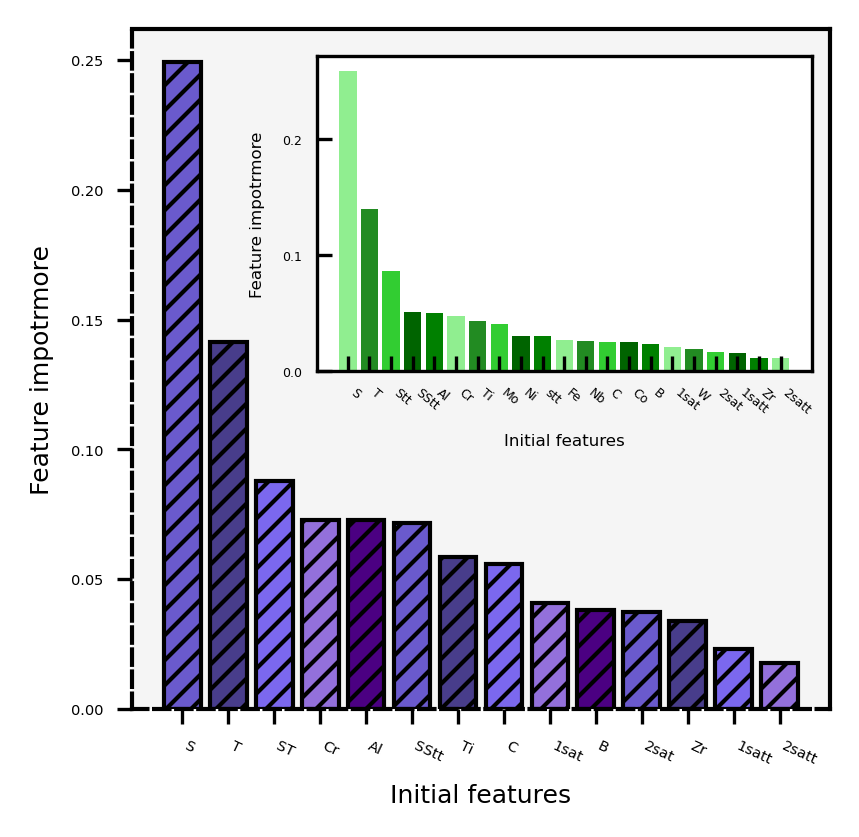

In [28]:
df1=dataframe_df.drop('Creep time',axis=1)
feat_name=df1.columns.values
importances=model.feature_importances_
imp_sort =np.argsort(importances)[::-1]
plt.rcParams['figure.figsize']=(3.0,3.0)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
ax = plt.axes()
ax.set_facecolor("whitesmoke")
ax.set(facecolor = "whitesmoke")
ax.spines['bottom'].set_linewidth('1')#设置边框线宽为2.0
ax.spines['bottom'].set_linestyle("--")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('1')#设置边框线宽为2.0
ax.spines['left'].set_linestyle("--")
ax.spines['left'].set_color('black')
#设置图框线粗细
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.bar(x=feat_name[imp_sort][0:14],height=importances[imp_sort][0:14],
        color=['slateblue','darkslateblue','mediumslateblue','mediumpurple','indigo'],edgecolor='k',hatch='////')
plt.xticks(rotation=-25,fontsize=3.5,ha='left')
plt.yticks(fontsize=3.5)
plt.xlabel('Initial features',size=6)
plt.ylabel('Feature impotrmore',size=6)
left, bottom, width, height = 0.33,0.5,0.55,0.35

plt.axes([left,bottom,width,height])
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
plt.bar(x=feat_name1[imp_sorts][0:21],height=importancess[imp_sorts][0:21],
        color=['lightgreen','forestgreen','limegreen','darkgreen','green'])
plt.xticks(rotation=-40,fontsize=3,ha='left')
plt.yticks(fontsize=3)
plt.xlabel('Initial features',size=4)
plt.ylabel('Feature impotrmore',size=4)
plt.savefig('./111png')


In [29]:
excluded=['时效时间','稳定时效时间','Zr']
dataframe_change5=dataframe_change4.drop(excluded,axis=1)
dataframe_change5

,Cr,Al,Ti,C,B,温度,应力,固溶处理温度,强化相溶解温度,稳定时效温度,时效温度,蠕变时间
0,19.31,1.44,3.12,0.042,0.004,700,450,1080,1037.00,845,760,1949.00
1,19.31,1.44,3.12,0.042,0.004,725,380,1080,1037.00,845,760,1550.00
2,19.31,1.44,3.12,0.042,0.004,725,350,1080,1037.00,845,760,1995.00
3,18.30,1.37,2.84,0.037,0.008,732,517,1080,1007.91,845,760,104.00
4,18.30,1.37,2.84,0.037,0.008,815,330,1080,1007.91,845,760,82.10
...,...,...,...,...,...,...,...,...,...,...,...,...
135,18.77,1.52,3.10,0.080,0.006,900,170,1100,1048.46,760,0,35.00
136,18.77,1.52,3.10,0.080,0.006,900,170,1100,1048.46,760,0,42.96
137,18.77,1.52,3.10,0.080,0.006,900,170,1120,1048.46,800,0,40.75
138,18.77,1.52,3.10,0.080,0.006,900,170,1120,1048.46,800,0,50.45


In [30]:
original_data4=dataframe_change5.values
data4 = original_data4[:, :-1]
target4 = original_data4[:, -1]
data_x4 = MinMaxScaler().fit_transform(data4)
data_y4 = np.log(target4)

In [31]:
data_xx=data_x4
data_yy=data_y4
def svm_c():
    param_grid={'C':[0.001,0.01,0.1,1,10,100],
           'gamma':[0.001,0.01,0.1,1,10,100]}
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    grid_search=GridSearchCV(SVC(),param_grid,cv=10)
    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    xx_data,yy_data=shuffle(data_xx,data_yy)
    xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.25)
    grid_search.fit(xx_train,yy_train.astype('int'))
    print("Best parameters:{}".format(grid_search.best_params_))
    print("Best cross-validation score:{:2f}".format(grid_search.best_score_))
def rf_c():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_val_score
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn.utils import shuffle
    x_data,y_data=shuffle(data_xx,data_yy)
    x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=.25)
    from sklearn.model_selection import RandomizedSearchCV
    criterion=['mse','mae']
    n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1500, num = 10)]
    max_features = ['auto','sqrt']
    max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]
    max_depth.append(None)
    min_samples_split = [9, 10, 11]
    min_samples_leaf = [2, 3, 5]
    bootstrap = [True, False]
    random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    clf= RandomForestRegressor()
    clf_random = RandomizedSearchCV(estimator=clf,
                                param_distributions=random_grid,
                                n_iter = 10,
                                cv = 10,
                                verbose=2,
                                random_state=42,
                                n_jobs=1)
    clf_random.fit(x_train, y_train)
    print (clf_random.best_params_)
    print(clf_random.best_score_)
def DT_c():
    a=list(np.arange(0.01,1,0.01))
    param_grid = [{'criterion':['gini'],'max_depth':[i for i in range(1,100,1)],'min_samples_leaf':[i for i in range(1,10,1)],
                   'min_impurity_decrease':a},
         {'criterion':['gini','entropy']},
         {'max_depth': [i for i in range(1,100,1)], 'min_impurity_decrease':a}]
    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor()
    grid_search=GridSearchCV(model,param_grid,cv=10)
    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    xx_data,yy_data=shuffle(data_xx,data_yy)
    xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.25)
    grid_search.fit(xx_train,yy_train.astype('int'))
    print("Best parameters:{}".format(grid_search.best_params_))
    print("Best cross-validation score:{:2f}".format(grid_search.best_score_))
def Ridge_c():
    a=list(np.arange(0.01,1,0.01))
    param_grid={'alpha':a,'normalize':[True,False]}
    from sklearn.model_selection import GridSearchCV
    from sklearn import linear_model
    model = linear_model.Ridge()
    grid_search=GridSearchCV(model,param_grid,cv=10)
    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    xx_data,yy_data=shuffle(data_xx,data_yy)
    xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.25)
    grid_search.fit(xx_train,yy_train.astype('int'))
    print("Best parameters:{}".format(grid_search.best_params_))
    print("Best cross-validation score:{:2f}".format(grid_search.best_score_))
def Lasso_c():
    a=list(np.arange(0.01,1,0.01))
    param_grid={'alpha':a}
    from sklearn.model_selection import GridSearchCV
    from sklearn import linear_model
    model = linear_model.Lasso()
    grid_search=GridSearchCV(model,param_grid,cv=10)
    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    xx_data,yy_data=shuffle(data_xx,data_yy)
    xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.1)
    grid_search.fit(xx_train,yy_train.astype('int'))
    print("Best parameters:{}".format(grid_search.best_params_))
    print("Best cross-validation score:{:2f}".format(grid_search.best_score_))
def Knn_c():
    param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,50,1)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,50,1)],
        'p':[i for i in range(1,10,1)]
    }
    ]
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import GridSearchCV
    knn_reg2=KNeighborsRegressor()
    grid_search=GridSearchCV(knn_reg2,param_grid,n_jobs=-1,verbose=1,cv=10)
    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    xx_data,yy_data=shuffle(data_xx,data_yy)
    xx_train,xx_test,yy_train,yy_test=train_test_split(xx_data,yy_data,random_state=0,test_size=.1)
    grid_search.fit(xx_train,yy_train.astype('int'))
    print("Best parameters:{}".format(grid_search.best_params_))
    print("Best cross-validation score:{:2f}".format(grid_search.best_score_))
def GBDT_c():
    import pandas as pd 
    import numpy as np
    from sklearn.model_selection import GridSearchCV 
    from sklearn.model_selection import train_test_split,KFold 
    import xgboost as xgb    
    import warnings
    x = data_xx
    y = data_yy
    seed =0
    test_size = 0.10 
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    model = xgb.XGBRegressor() 
    #alpha=list(np.arange(0.00001,0.00005,0.00001))
    learning_rate = list(np.arange(0.1,10,0.1))
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
    max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
    param_grid = dict(learning_rate = learning_rate,n_estimators = n_estimators,max_depth=max_depth)
    kflod=KFold(n_splits=10,shuffle=True) 
    grid_search = GridSearchCV(model,param_grid,scoring = 'neg_mean_squared_error',n_jobs = -1,cv = kflod)
    grid_result = grid_search.fit(X_train, Y_train) 
    print("Best: %f using %s" % (-grid_result.best_score_,grid_search.best_params_))

In [32]:
if __name__ == "__main__":
    svm_c()
    rf_c()
    Ridge_c()
    Lasso_c()
    Knn_c()
    GBDT_c()

C:\anocala\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best parameters:{'C': 100, 'gamma': 1}
Best cross-validation score:0.604545
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=11, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=True, criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=3, min

[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=11, n_estimators=1055; total time=   0.3s
[CV] END bootstrap=False, criterion=mse, max_depth=None, max_fea

ModuleNotFoundError: No module named 'xgboost'

In [33]:
def fitness_fuction(y_pred, y_true):
    return 1-abs(np.sum((y_pred-y_true)/y_true)/len(y_pred))
def mape_function(y_pred, y_true):
    return abs(np.sum((y_pred - y_true) / y_true) / len(y_pred))
def percentage_error(y, y_predict ):
    error = np.average( abs(np.subtract(y_predict, y) / y))
    return error * 100

No handles with labels found to put in legend.


10 times mean R2:0.85
10 time mean Fitness:0.9921
10 time mean MAPE:0.0079
10 time mean Error:5.4265


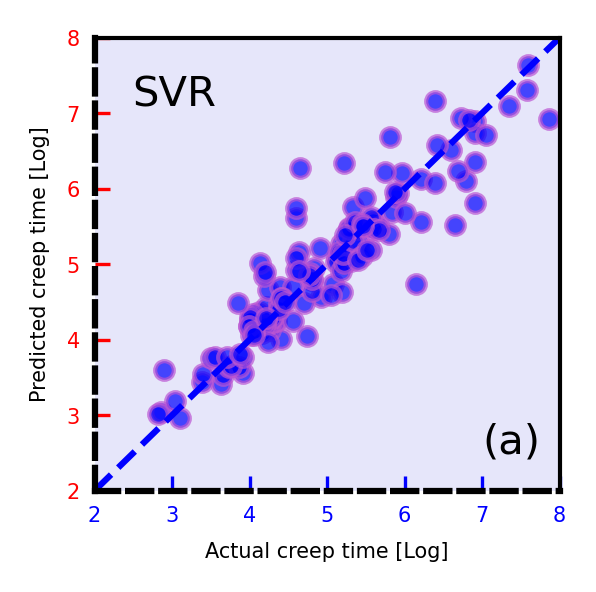

<Figure size 600x600 with 0 Axes>

In [44]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.svm import SVR#支持向量机回归
model=SVR(C=105,kernel='rbf',gamma=1.5)
model.fit(data_x4,data_y4)
crossvalidation=KFold(n_splits=10,shuffle=True)
r2_svr=cross_val_score(model,data_x4,data_y4,cv=crossvalidation)
print('10 times mean R2:%.2f'% r2_svr.mean())
from sklearn.model_selection import cross_val_predict
y_cv2=cross_val_predict(model,data_x4,data_y4,cv=crossvalidation)
fitness = fitness_fuction(y_cv2, data_y4)
mape = mape_function(y_cv2, data_y4)
Error=percentage_error(y_cv2,data_y4)
print('10 time mean Fitness:%.4f'% fitness)
print('10 time mean MAPE:%.4f'% mape)
print('10 time mean Error:%.4f'% Error)
plt.rcParams['figure.figsize']=(2.0,2.0)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
ax = plt.axes()
ax.set_facecolor("lavender")
ax.set(facecolor = "lavender")
ax.spines['bottom'].set_linewidth('1.5')#设置边框线宽为2.0
ax.spines['bottom'].set_linestyle("--")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('1.5')#设置边框线宽为2.0
ax.spines['left'].set_linestyle("--")
ax.spines['left'].set_color('black')
#设置图框线粗细
bwith = 1 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
new_ticks = list(np.arange(2,9,1))
plt.xticks(new_ticks,size=5)
plt.yticks(new_ticks,size=5)
plt.legend(title='SVR',frameon=False)
plt.text(7, 2.5,'(a)',fontsize=10)# 在图中添加文字
plt.plot([2,8],[2,8],'b--')
plt.scatter(data_y4,y_cv2,color='blue',alpha=0.7,s=20,linewidths=1,edgecolors='mediumorchid')
plt.tick_params(axis='x',colors='blue')
plt.tick_params(axis='y',colors='red')
plt.xlabel('Actual creep time [Log]',size=5)
plt.ylabel('Predicted creep time [Log]',size=5)
plt.margins(x=0)
plt.margins(y=0)
plt.show()
plt.savefig('./1png')